# Customers Leaving the bank

The story: A bank is investigating a very high rate of customer leaving the bank. Here is a 10,000 records dataset to investigate and predict which of the customers are more likely to leave the bank soon.

I've used Artificial Neural Networks to train the model

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

## Exploratory Data Analysis

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.Exited.unique()

array([1, 0], dtype=int64)

In [7]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

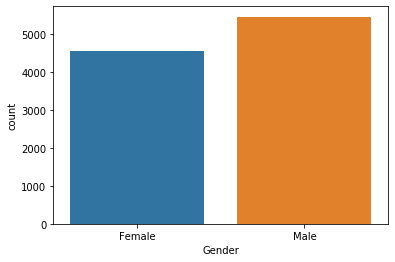

In [8]:
sns.countplot(x=df['Gender'])

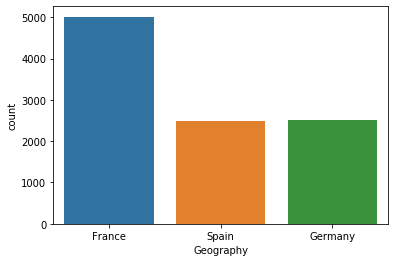

In [9]:
sns.countplot(x=df['Geography'])

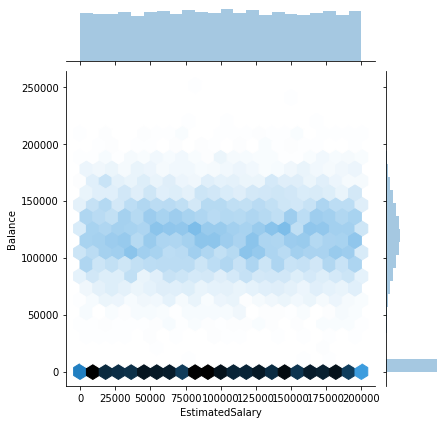

In [10]:
sns.jointplot(x=df['EstimatedSalary'], y=df['Balance'], kind='hex')

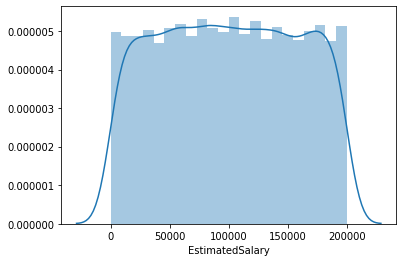

In [11]:
sns.distplot(df['EstimatedSalary'])

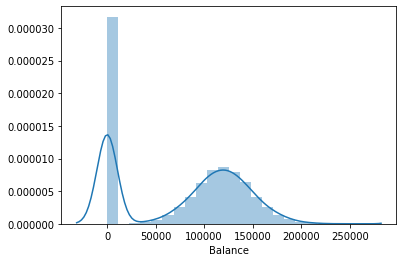

In [12]:
sns.distplot(df['Balance'])

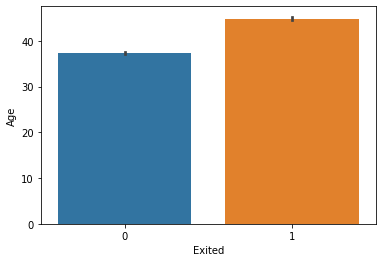

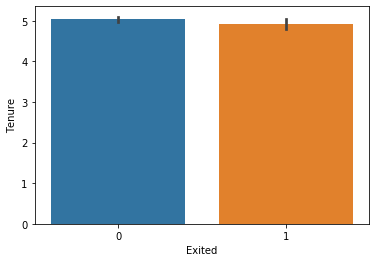

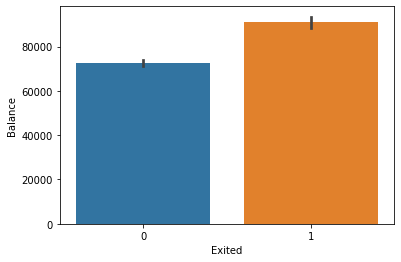

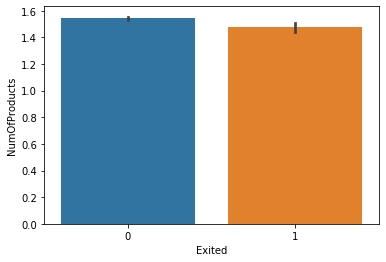

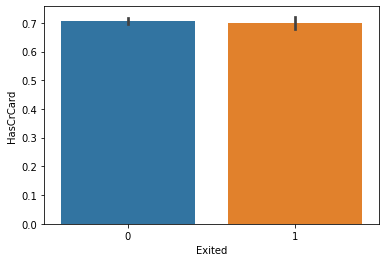

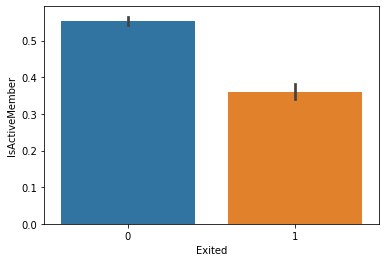

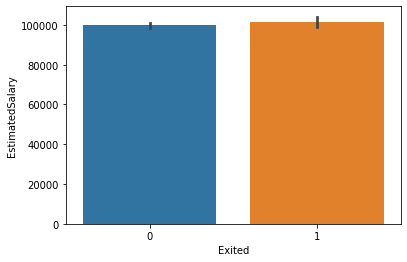

In [13]:
y_axis = ['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
x_axis = 'Exited'
import matplotlib.pyplot as plt
for feature in y_axis:
    plt.figure(y_axis.index(feature))
    sns.barplot(x=df[x_axis], y=df[feature])

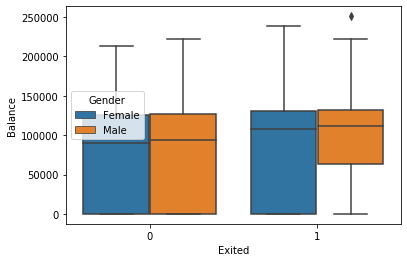

In [14]:
sns.boxplot(x='Exited',y='Balance',data=df, hue='Gender')

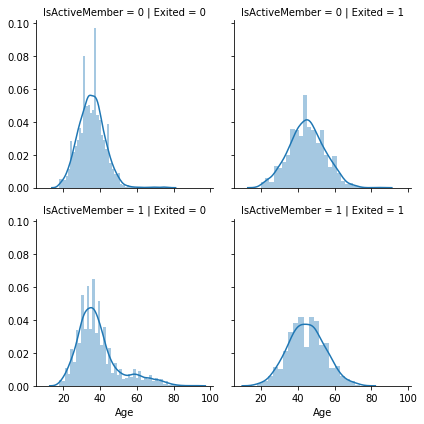

In [15]:
g = sns.FacetGrid(data=df, col='Exited', row='IsActiveMember')
g.map(sns.distplot, 'Age')

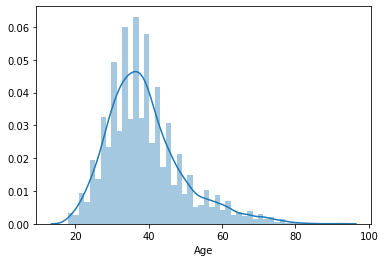

In [16]:
sns.distplot(df['Age'])

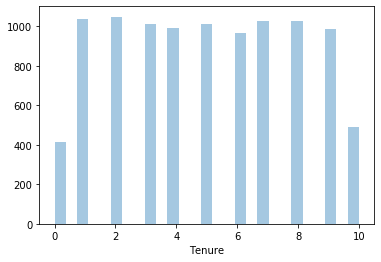

In [17]:
sns.distplot(df['Tenure'], kde=False)

In [18]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Splitting the dependant and independant variables

In [19]:
X = df.iloc[:, 3:13].values
y = df.iloc[:, 13].values

In [20]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [21]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

## Encoding the countries column

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("EncodingTheCountriesColumn", OneHotEncoder(), [1])], remainder = 'passthrough')
X = ct.fit_transform(X)

In [23]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [24]:
X[0]

array([1.0, 0.0, 0.0, 619, 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

## Dummy Variable Trap

In [25]:
X = X[:, 1:]

In [26]:
X[0]

array([0.0, 0.0, 619, 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

## Encoding the Gender Column

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X[:,3] = encoder.fit_transform(X[:,3])

In [28]:
X[0]

array([0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88], dtype=object)

In [29]:
X

array([[0.0, 0.0, 619, ..., 1, 1, 101348.88],
       [0.0, 1.0, 608, ..., 0, 1, 112542.58],
       [0.0, 0.0, 502, ..., 1, 0, 113931.57],
       ...,
       [0.0, 0.0, 709, ..., 0, 1, 42085.58],
       [1.0, 0.0, 772, ..., 1, 0, 92888.52],
       [0.0, 0.0, 792, ..., 1, 0, 38190.78]], dtype=object)

## Splitting the independant and dependant variables into training and testing set

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Scaling the independant variables using the StandardScaler

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
X_train

array([[-0.57696537, -0.57908232, -0.16211979, ..., -1.54358798,
         0.96752696,  1.13149066],
       [-0.57696537,  1.72687019, -0.07934622, ...,  0.64784127,
        -1.03356293,  1.31217315],
       [-0.57696537, -0.57908232, -1.07262902, ...,  0.64784127,
         0.96752696,  0.59026591],
       ...,
       [-0.57696537,  1.72687019,  0.41729517, ...,  0.64784127,
         0.96752696,  0.0913753 ],
       [-0.57696537, -0.57908232,  0.61388239, ...,  0.64784127,
        -1.03356293,  0.27872142],
       [ 1.73320628, -0.57908232,  0.3448683 , ...,  0.64784127,
        -1.03356293,  1.52551967]])

## Training the model using Keras

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [34]:
model = Sequential()

In [35]:
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

In [36]:
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

In [37]:
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [38]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [39]:
model.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
8000/8000 [==============================] - 1s 136us/step - loss: 0.4792 - accuracy: 0.7974
Epoch 2/100
8000/8000 [==============================] - 1s 96us/step - loss: 0.4240 - accuracy: 0.7974
Epoch 3/100
8000/8000 [==============================] - 1s 95us/step - loss: 0.4179 - accuracy: 0.8095
Epoch 4/100
8000/8000 [==============================] - 1s 96us/step - loss: 0.4146 - accuracy: 0.8260
Epoch 5/100
8000/8000 [==============================] - 1s 94us/step - loss: 0.4120 - accuracy: 0.8300
Epoch 6/100
8000/8000 [==============================] - 1s 98us/step - loss: 0.4104 - accuracy: 0.8319
Epoch 7/100
8000/8000 [==============================] - 1s 95us/step - loss: 0.4090 - accuracy: 0.8338
Epoch 8/100
8000/8000 [==============================] - 1s 99us/step - loss: 0.4079 - accuracy: 0.8345
Epoch 9/100
8000/8000 [==============================] - 1s 101us/step - loss: 0.4064 - accuracy: 0.8359
Epoch 10/100
8000/8000 [==============================] - 1s 9

8000/8000 [==============================] - 1s 94us/step - loss: 0.3964 - accuracy: 0.8397
Epoch 79/100
8000/8000 [==============================] - 1s 104us/step - loss: 0.3960 - accuracy: 0.8391
Epoch 80/100
8000/8000 [==============================] - 1s 95us/step - loss: 0.3957 - accuracy: 0.8407
Epoch 81/100
8000/8000 [==============================] - 1s 93us/step - loss: 0.3958 - accuracy: 0.8399
Epoch 82/100
8000/8000 [==============================] - 1s 96us/step - loss: 0.3958 - accuracy: 0.8405
Epoch 83/100
8000/8000 [==============================] - 1s 95us/step - loss: 0.3961 - accuracy: 0.8382
Epoch 84/100
8000/8000 [==============================] - 1s 97us/step - loss: 0.3957 - accuracy: 0.8405
Epoch 85/100
8000/8000 [==============================] - 1s 103us/step - loss: 0.3957 - accuracy: 0.8396
Epoch 86/100
8000/8000 [==============================] - 1s 113us/step - loss: 0.3957 - accuracy: 0.8390
Epoch 87/100
8000/8000 [==============================] - 1s 115u

## Predicting the Results

In [40]:
y_pred = model.predict(X_test)

In [41]:
y_pred

array([[0.08853671],
       [0.0344153 ],
       [0.04884994],
       ...,
       [0.40751693],
       [0.15333566],
       [0.103383  ]], dtype=float32)

## Converting the y_pred array into an array of boolean values

Essentially any value beyong 0.5 will be **True**, and any value less than 0.5 will be **False**

In [42]:
y_pred = (y_pred > 0.5)

In [43]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

## Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [45]:
cm

array([[1527,   57],
       [ 289,  127]], dtype=int64)

## Test set prediction accuracy

In [46]:
(1527+127)/2000

0.827

## Conclusion

Training set accuracy = 0.8389

Test set accuracy = 0.827